In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import figure

In [2]:
def vis_classification(dataframe, no_features, first_feature, last_feature, line, location_line, subset, label_line, name_sensor):
    fig = plt.figure(figsize=(12,6), dpi=200)
    ax = fig.add_subplot(111)
    columns = dataframe.columns
    t = dataframe["up time recipe_67"]
    for i in range(first_feature,last_feature):
        # Values about appearance of anomaly 
        palette = []
        anomaly_label = dataframe.iloc[:, i+3*no_features].values
        if 0 in anomaly_label and 1 not in anomaly_label:
            palette = ["green"]
        elif 1 in anomaly_label and 0 not in anomaly_label:
            palette = ["red"]
        elif 0 in anomaly_label and 1 in anomaly_label:
            palette = ["green","red"]
            
        # Predicted sensor values
        sns.lineplot(data=dataframe, 
                     x=t, 
                     y=columns[i+no_features], 
                     ax=ax, 
                     color="black",
                     label="$\hat{y}$",
                     linewidth=.6)
        
        # Target sensor values (actual sensor values)
        sns.scatterplot(data=dataframe, 
                        x=t, 
                        y=columns[i],
                        ax=ax,
                        hue=columns[i+3*no_features], 
                        palette=palette,
                        s=20,
                        linewidth=0)
        
        # Line to show known failures
        if line:
            for r, location in enumerate(location_line):
                if r == 0:
                    ax.axvline(location, 0,2, color="b", linestyle ="--", linewidth=3, label=label_line)
                else:
                    ax.axvline(location, 0,2, color="b", linestyle ="--", linewidth=1.5)
                
        # Set labels etc.
        ax.legend(loc='upper center', 
                  bbox_to_anchor=(0.5, -0.15),
                  fancybox=True, 
                  shadow=True, 
                  ncol=5,
                  prop={'size': 14})
        ax.tick_params(labelsize=12)
        ax.set_xlabel("Running time of machine with recipe No. 67 [in s]", fontsize=16)
        ax.set_ylabel("")
        ax.set_ylim(-4,2)
        ax.set_title("Sensor: IONGAUGEPRESSURE", fontsize=14)

In [3]:
def vis_reconstruction_error(dataframe, no_features, first_feature, last_feature, thresholds_mean, subset):
    #fig, axes = plt.subplots(subset, 1, figsize=(10,6), dpi=200)
    fig = plt.figure(figsize=(8,5), dpi=200)
    ax = fig.add_subplot(111)
    columns = dataframe.columns
    t = dataframe.iloc[:,0]
    for i in range(first_feature, last_feature):
        sns.scatterplot(data=dataframe, 
                     x=t, 
                     y=dataframe.iloc[:, i+2*no_features],
                     ax=ax,
                     color="black",
                     linewidth=0.2,
                     s = 15,
                     label="Euclidean Distance \n between $y$ and $\hat{y}$")
        
        ax.axhline(thresholds_mean[i-first_feature], 
                            color="red", 
                            linestyle ="-", 
                            linewidth=2,
                            label="threshold (mean RE plus 40%)")
        
        ax.axhline(2.1, 
                    color="blue", 
                    linestyle ="-", 
                    linewidth=2,
                    label="threshold (max RE minus 40%)")
        
        # Set labels etc. 
        ax.legend(loc='upper center', 
                  bbox_to_anchor=(0.5, -0.15),
                   fancybox=True, 
                   shadow=True, 
                   ncol=5,
                   prop={'size': 11})
        ax.set_xlabel("time in s]", fontsize=12)
        ax.set_ylabel("reconstruction error", fontsize=12)

## Predicted Data

In [4]:
artifical_data = pd.read_csv("../../files/classification/MSE/phm67_mean_plus_40percent.csv", sep=";")
training_set = artifical_data.iloc[:50000,:]

In [5]:
# Name of Sensors
name_of_sensor = ["IONGAUGEPRESSURE",
                  "ETCHBEAMVOLTAGE",
                  "ETCHBEAMCURRENT",
                  "ETCHSUPPRESSORVOLTAGE",
                  "ETCHSUPPRESSORCURRENT",
                  "FLOWCOOLFLOWRATE",
                  "FLOWCOOLPRESSURE",
                  "ETCHGASCHANNEL1READBACK",
                  "ETCHPBNGASREADBACK",
                  "FIXTURETILTANGLE",
                  "ACTUALROTATIONANGLE",
                  "ACTUALSTEPDURATION"]

## Reconstruction Error during Training

In [12]:
thresholds_training_mean = [0.1010492374011701, 0.11756227450933948, 0.07937848364476605, 0.10853243510317657, 
                            0.10570055771211723, 0.0857727231192026, 0.07568253576225717, 0.09385799791533005, 
                            0.13053110110886396, 0.07788286969806985, 0.07917948961852328, 0.06592829119438347]

In [13]:
thresholds_training = [i*1.4 for i in thresholds_training_mean]

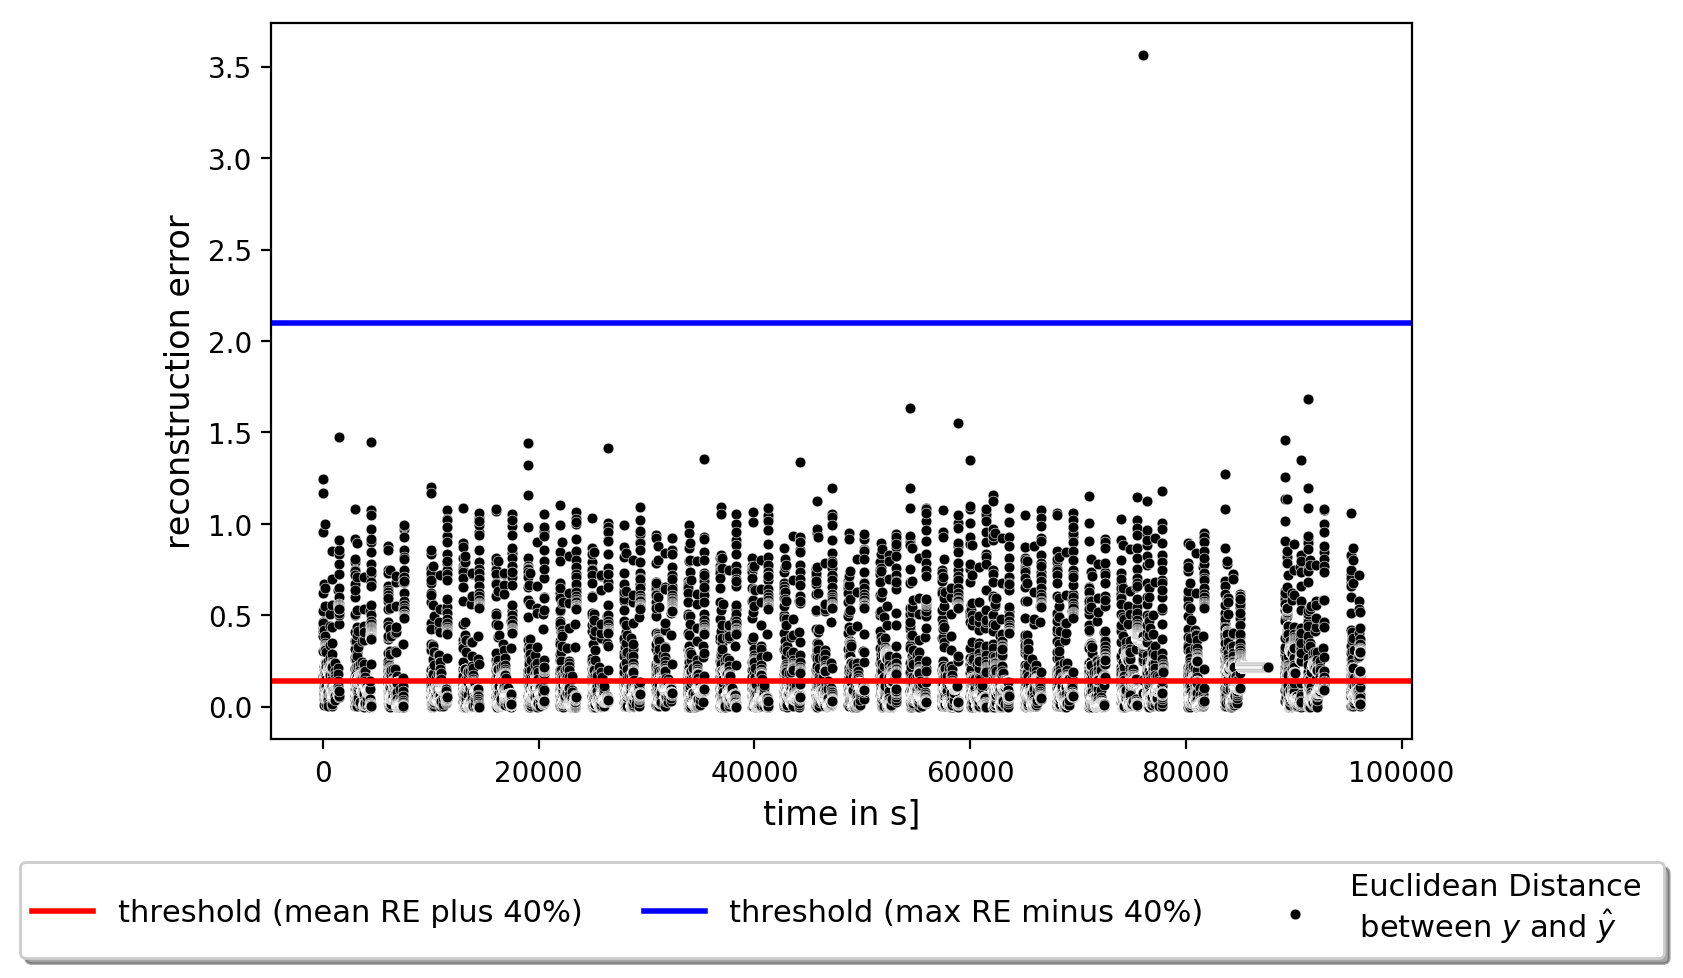

In [20]:
vis_reconstruction_error(dataframe=training_set, 
                         no_features=12, 
                         first_feature=1, 
                         last_feature=2, 
                         thresholds_mean=thresholds_training,
                         subset=2)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(pad=1)
plt.savefig("./pictures/re_phm_paper.png")
plt.show()

# Visualisation of Classification
## Failures

In [6]:
all_failures_67 =[3807966., 3814610., 3815890., 3816362., 3856686., 3860122., 3865202., 3867646., 3868170.,
       3870094., 6539522., 6549554., 6572426., 6573162., 6574566., 6575118., 6575566., 6577254., 6582502., 6586022.]

## Examples of predictions before failures 

In [10]:
artifical_data = pd.read_csv("../../files/classification/MSE/phm67_max_minus_60percent_vis.csv", sep=";")
subset_1 = artifical_data.loc[(artifical_data["up time recipe_67"]>= 3470000) & (artifical_data["up time recipe_67"]<= 3558174)]

In [11]:
failures = [3556174.]

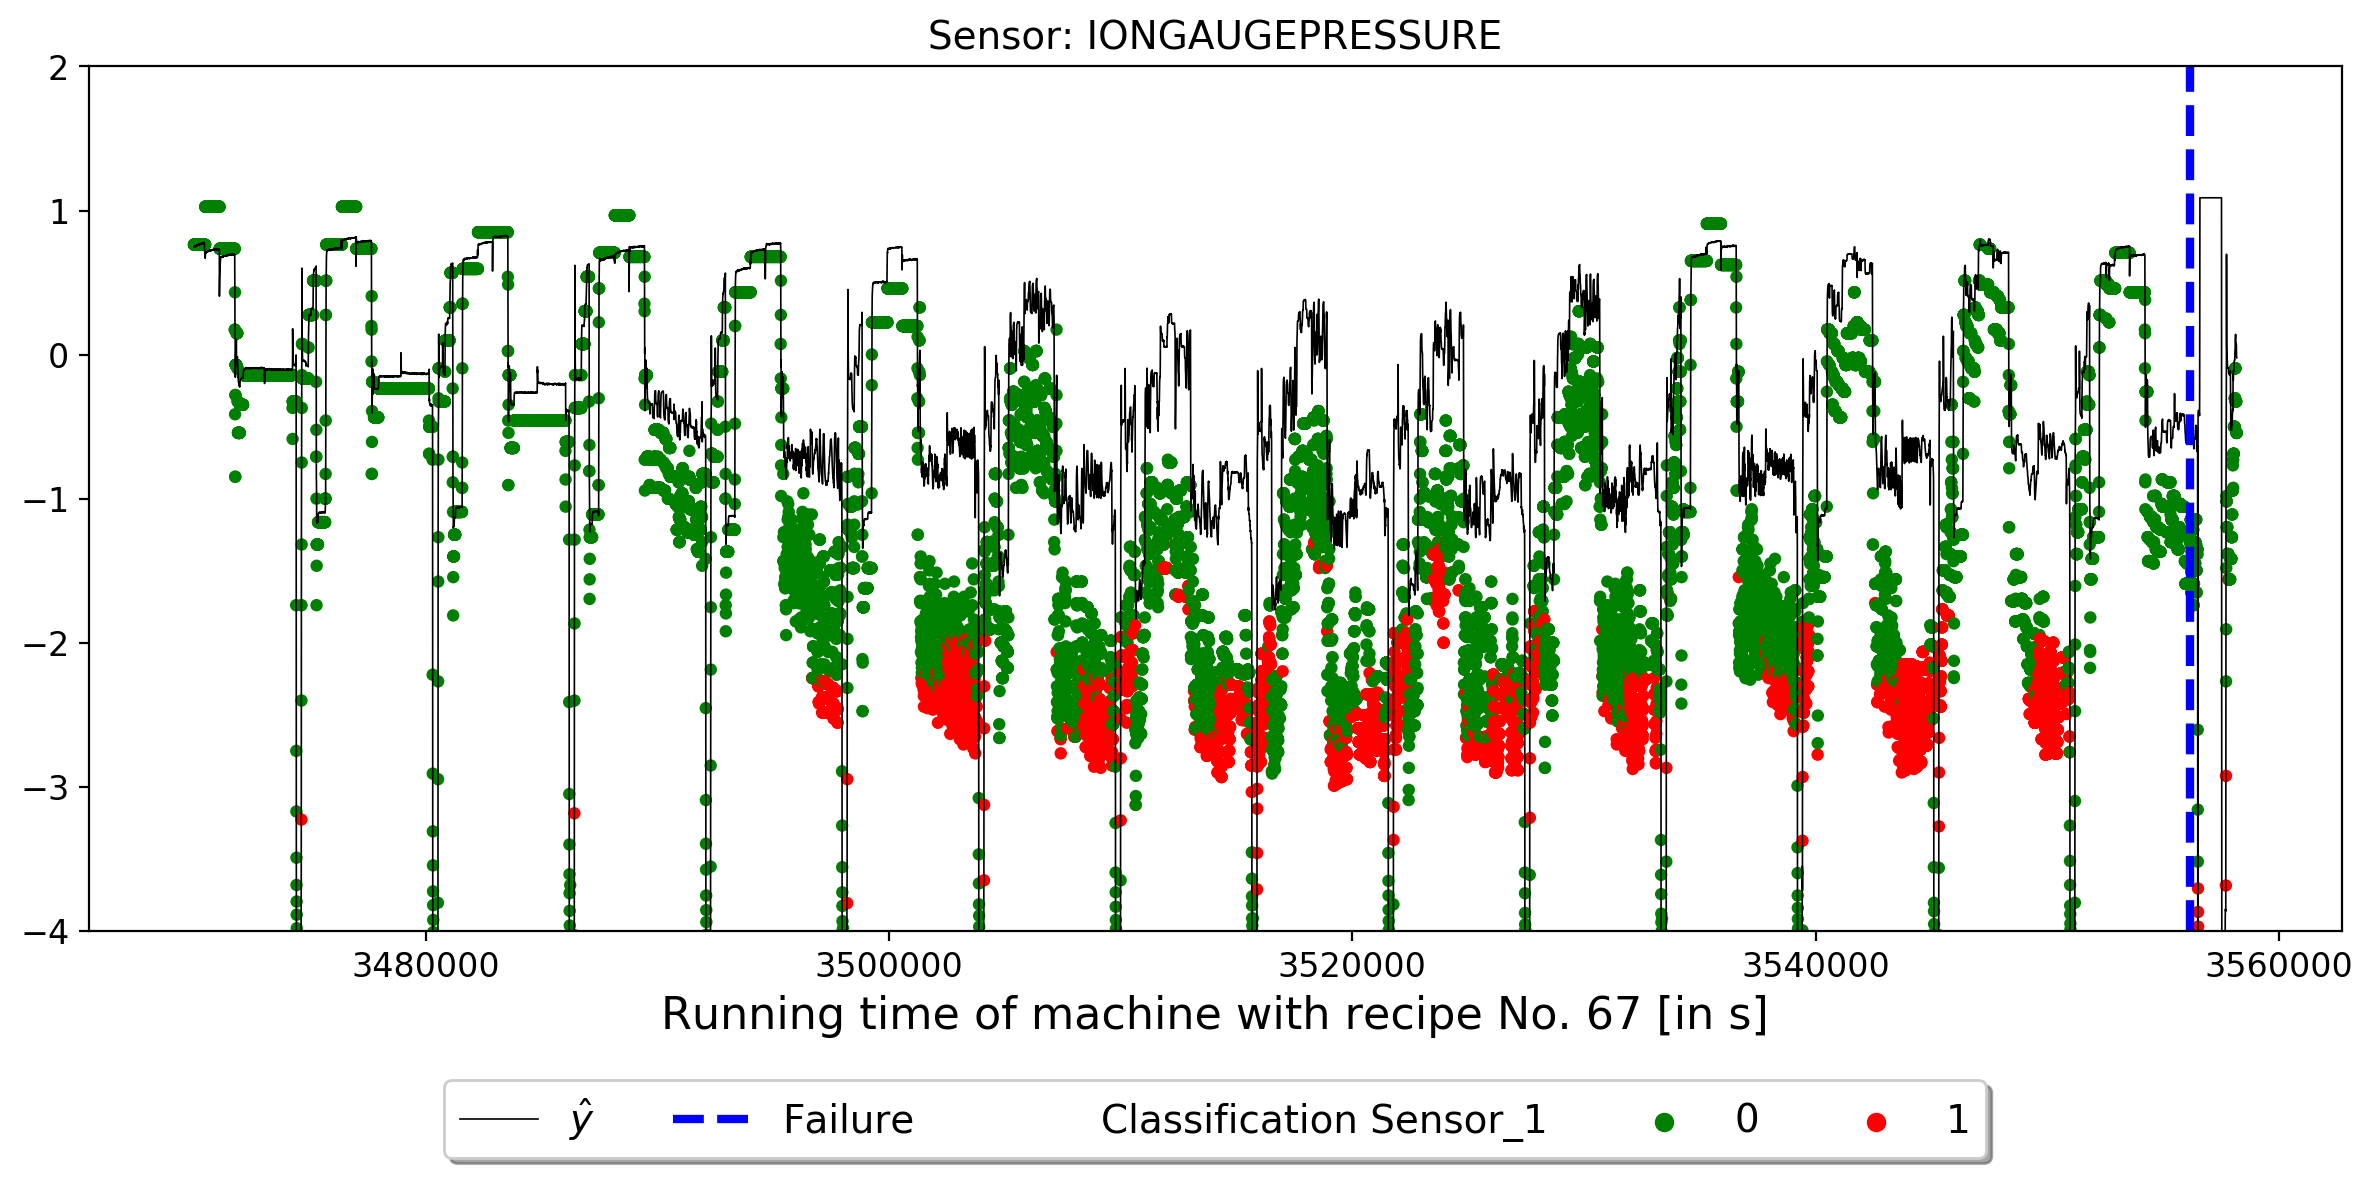

In [12]:
vis_classification(dataframe = subset_1,
                   no_features=12, 
                   first_feature=1, 
                   last_feature=2,
                   line = True,
                   location_line = failures,
                   subset = 2,
                   label_line="Failure",
                   name_sensor=name_of_sensor)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(pad=1)
plt.savefig("./pictures/classfic_phm_0_paper.png")
plt.show()

In [83]:
artifical_data = pd.read_csv("../../files/classification/MSE/phm67_max_minus_60percent_vis.csv", sep=";")
subset_2 = artifical_data.loc[(artifical_data["up time recipe_67"]>= 3400000) & (artifical_data["up time recipe_67"]<= 3430000)]

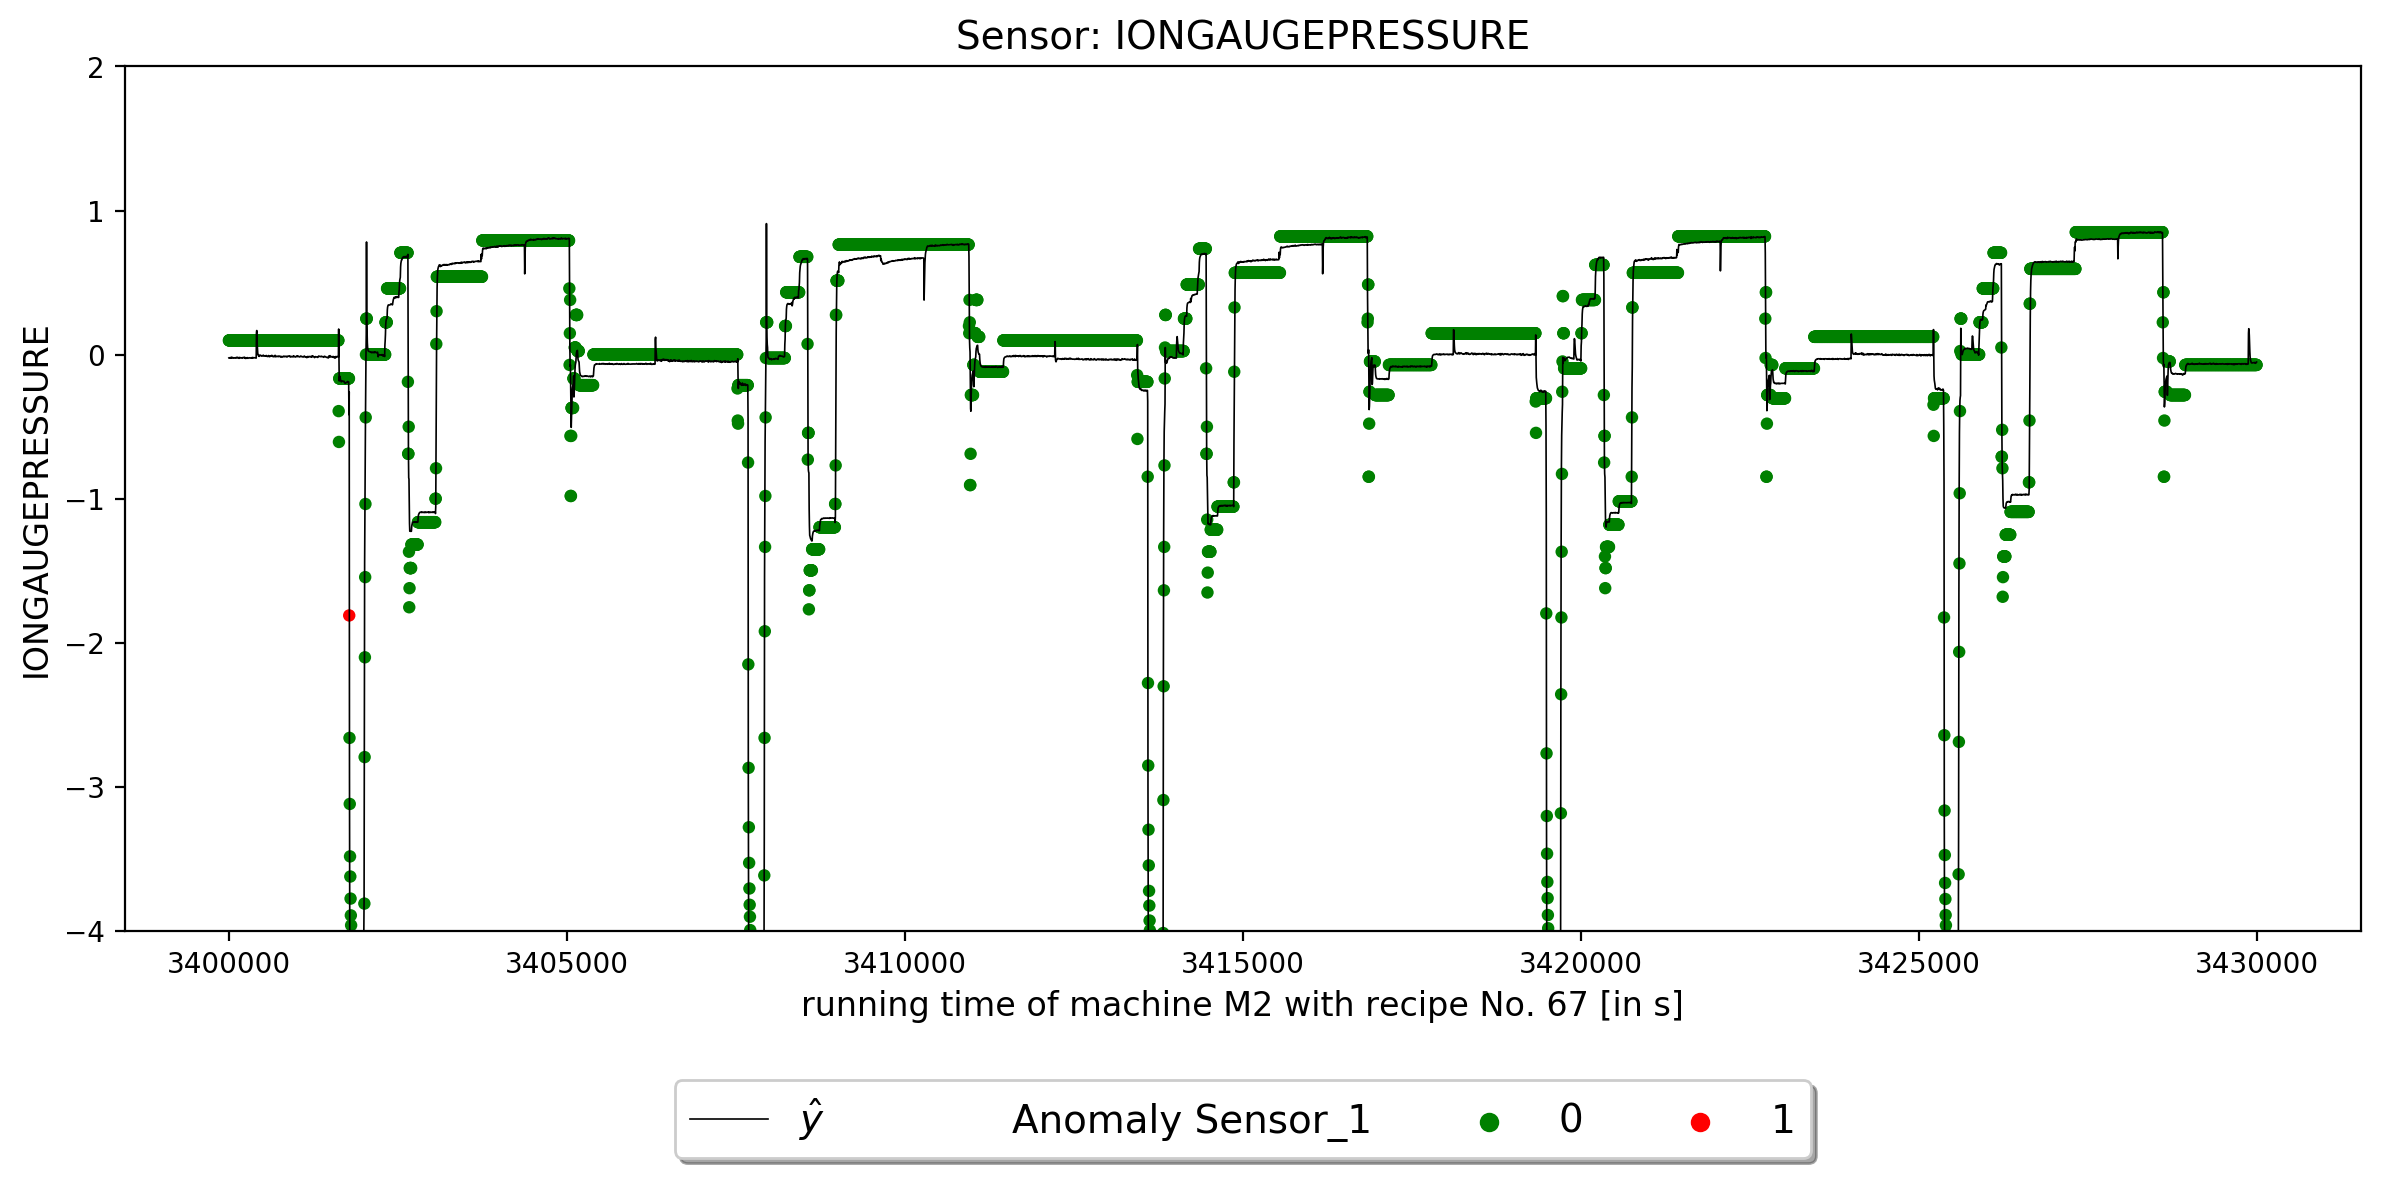

In [84]:
vis_classification(dataframe = subset_2,
                   no_features=12, 
                   first_feature=1, 
                   last_feature=2,
                   line = False,
                   location_line = failures,
                   subset = 2,
                   label_line="Failure",
                   name_sensor=name_of_sensor)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(pad=1)
plt.savefig("./pictures/classfic_phm_no_error.png")
plt.show()